In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import time

print('Using Tensorflow version: ', tf.version.VERSION)

def isThereGPU():
    print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
    print("Num CPUs Available: ", len(tf.config.list_physical_devices('CPU')))

isThereGPU()

Using Tensorflow version:  2.13.0-rc1
Num GPUs Available:  0
Num CPUs Available:  1


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
def createModel():

    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(784, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(1568, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(2080, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(1568, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(784, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.00001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.RootMeanSquaredError()])
    return model

model = createModel()

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 784)               615440    
                                                                 
 dropout_5 (Dropout)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 1568)              1230880   
                                                                 
 dropout_6 (Dropout)         (None, 1568)              0         
                                                                 
 dense_8 (Dense)             (None, 2080)              3263520   
                                                                 
 dropout_7 (Dropout)         (None, 2080)             

In [10]:
start_time = time.time()
history = model.fit(x_train, y_train, batch_size=64, epochs=50)
#model.evaluate(x_test, y_test)
print(f'Time taken: {time.time()-start_time}')
#print(x_train.shape, y_train.shape)


Epoch 1/50
938/938 [==============================] - 16s 17ms/step - loss: 0.3519 - accuracy: 0.8943 - root_mean_squared_error: 5.2321
Epoch 2/50
938/938 [==============================] - 19s 20ms/step - loss: 0.2739 - accuracy: 0.9173 - root_mean_squared_error: 5.2325
Epoch 3/50
938/938 [==============================] - 22s 24ms/step - loss: 0.2283 - accuracy: 0.9321 - root_mean_squared_error: 5.2328
Epoch 4/50
938/938 [==============================] - 22s 24ms/step - loss: 0.1980 - accuracy: 0.9408 - root_mean_squared_error: 5.2329
Epoch 5/50
938/938 [==============================] - 21s 22ms/step - loss: 0.1748 - accuracy: 0.9475 - root_mean_squared_error: 5.2331
Epoch 6/50
938/938 [==============================] - 21s 22ms/step - loss: 0.1555 - accuracy: 0.9523 - root_mean_squared_error: 5.2332
Epoch 7/50
938/938 [==============================] - 21s 22ms/step - loss: 0.1421 - accuracy: 0.9570 - root_mean_squared_error: 5.2332
Epoch 8/50
773/938 [=======================>....

KeyboardInterrupt: 

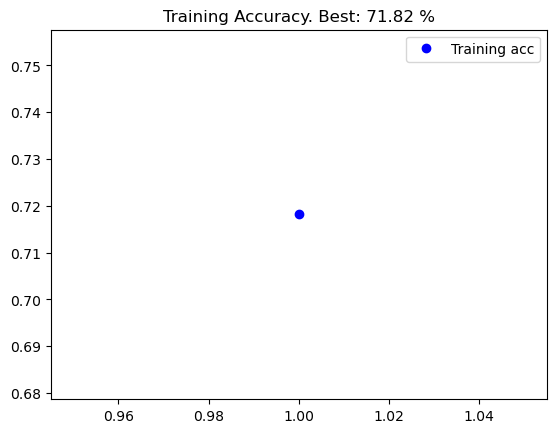

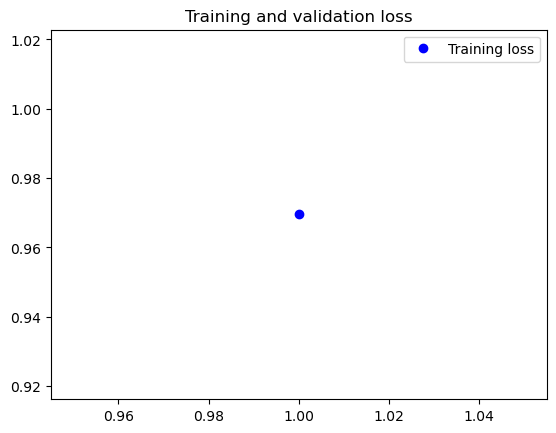

In [9]:
## Plot Accuracy and Loss
acc = history.history['accuracy']

loss = history.history['loss']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training Accuracy. Best: ' + str(round(acc[len(epochs)-1] * 100, 2)) + " %")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# pick a sample to plot
# sample = 8
# image = x_train[sample]
# plot the sample
# fig = plt.figure
# plt.imshow(image, cmap='gray')
# plt.show()
# print(y_train[sample])